In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn

In [2]:
dataset = pd.read_csv("data/IRIS_flower.csv").values

# Create dataset for training
xs = torch.tensor([list(x[:-1]) for x in dataset], dtype=torch.float32)
ys_raw = [x[-1] for x in dataset]

# Create a dictionary from y -> idx & vice-versa
idx_to_ys = {}
for idx, name in enumerate(set(ys_raw)):
    idx_to_ys[idx] = name

ys_to_idx = {}
for idx, val in idx_to_ys.items():
    ys_to_idx[val] = idx

# One-Hot Encode Ys
# format ys to idx
ys = torch.zeros(150, 3)
for i in range(len(ys_raw)):
    ys[i][ys_to_idx[ys_raw[i]]] = 1

In [3]:
n_features = xs.shape[1]
n_out = ys.shape[1]

In [4]:
# Define model
model = nn.Sequential(
    nn.Linear(n_features, 16),
    nn.Tanh(),
    nn.Linear(16, 16),
    nn.Tanh(),
    nn.Linear(16, n_out),
    nn.Softmax(dim=0)
)

In [5]:
# train model
epochs = 1500

# specify loss function & optimizer
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# track metrics
losses = []
model_performance = []

# Train model
for epoch in range(epochs):

    # Do the forward pass
    y_preds = model(xs)
    loss = loss_func(y_preds, ys)

    # Calculate accuracy
    accuracy = (
        torch.argmax(y_preds, dim=1) == torch.argmax(ys, dim=1)
    ).sum().item() / len(xs)

    # Log performance
    print(
        f"Epoch: {epoch}; Loss: {round(loss.item(), 3)}; Accuracy: {round(accuracy, 2)}..."
    )

    # Track metric
    losses.append(loss.item())
    model_performance.append(accuracy)

    # Do gradient descent
    optimizer.zero_grad()
    loss.backward()

    # update params
    optimizer.step()

Epoch: 0; Loss: 1.098; Accuracy: 0.66...
Epoch: 1; Loss: 1.098; Accuracy: 0.66...
Epoch: 2; Loss: 1.098; Accuracy: 0.66...
Epoch: 3; Loss: 1.098; Accuracy: 0.66...
Epoch: 4; Loss: 1.098; Accuracy: 0.65...
Epoch: 5; Loss: 1.098; Accuracy: 0.65...
Epoch: 6; Loss: 1.098; Accuracy: 0.65...
Epoch: 7; Loss: 1.098; Accuracy: 0.65...
Epoch: 8; Loss: 1.098; Accuracy: 0.65...
Epoch: 9; Loss: 1.098; Accuracy: 0.65...
Epoch: 10; Loss: 1.098; Accuracy: 0.65...
Epoch: 11; Loss: 1.098; Accuracy: 0.65...
Epoch: 12; Loss: 1.098; Accuracy: 0.65...
Epoch: 13; Loss: 1.098; Accuracy: 0.65...
Epoch: 14; Loss: 1.098; Accuracy: 0.65...
Epoch: 15; Loss: 1.098; Accuracy: 0.65...
Epoch: 16; Loss: 1.098; Accuracy: 0.65...
Epoch: 17; Loss: 1.098; Accuracy: 0.65...
Epoch: 18; Loss: 1.098; Accuracy: 0.65...
Epoch: 19; Loss: 1.098; Accuracy: 0.65...
Epoch: 20; Loss: 1.098; Accuracy: 0.65...
Epoch: 21; Loss: 1.097; Accuracy: 0.65...
Epoch: 22; Loss: 1.097; Accuracy: 0.65...
Epoch: 23; Loss: 1.097; Accuracy: 0.65...
Ep

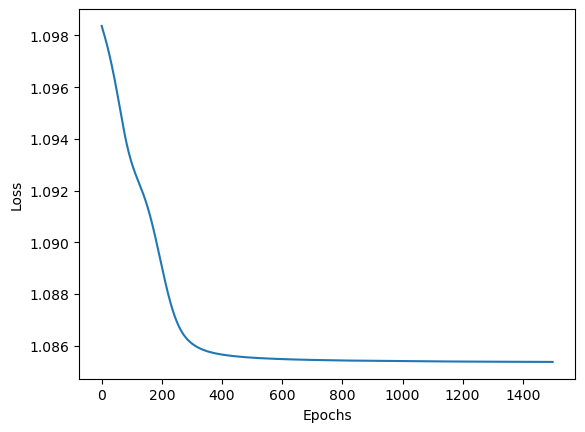

In [6]:
# Plot Loss
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(losses)

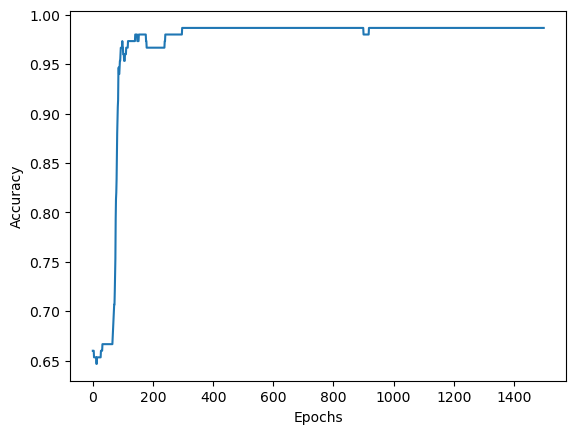

In [7]:
# Plot Accuracy
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(model_performance)